In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from src.data.toy_data import *
from src.visualization.plots import *
from src.utils import *
from src.model.SupportSubsetEstimator import *
from src.model.moess import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Overlapping bivariate normals

In [4]:
# Parameters
seed1 = 1
seed2 = 2
n0 = 1000
n1 = 1000

# Dataset 8
mu0 = [0, 0]
sigma0 = [[80, 0], [0, 5]]
mu1 = [20, 3]
sigma1 = [[9, 2], [2, 9]]

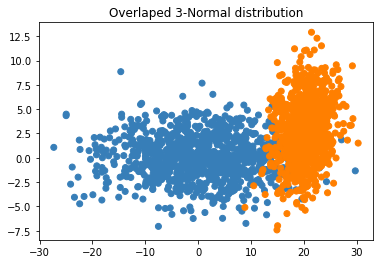

In [5]:
X, y = normal_generator2(mu0, sigma0, n0, mu1, sigma1, n1, seed1, seed2)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

In [6]:
ss_estimator = SupportSubsetEstimator()

In [7]:
ss_estimator.fit(X, y)

In [8]:
len(sorted(ss_estimator.supportsubset))

498

## SVM

In [9]:
svm = SVC(**ss_estimator.best_params_)

In [10]:
svm.fit(X, y)

SVC(C=10, gamma=0.1)

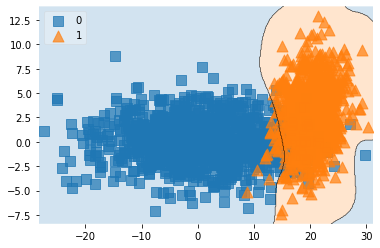

In [11]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

In [12]:
svm = SVC(**ss_estimator.best_params_)

In [13]:
svm.fit(X[ss_estimator.supportsubset], y[ss_estimator.supportsubset])

SVC(C=10, gamma=0.1)

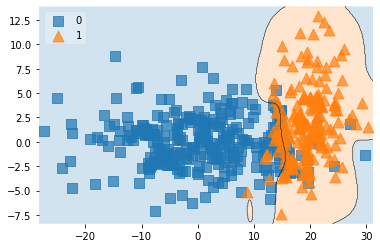

In [14]:
fig1 = plt.gcf()
custom_decision_region_plot(X[ss_estimator.supportsubset], y[ss_estimator.supportsubset], svm, title='')

## MOESS

In [34]:
clf = MOESS(method=SVC, 
                 params={'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, 
                 sample_size=None, 
                 wrab=False, 
                 max_features='auto', 
                 lam=5, 
                 eval_metric=accuracy_score, 
                 prop_sample=0.1, 
                 n_learners=30,
                 n_jobs=-1,
                 random_state=1234)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [35]:
clf.fit(X, y, ss_estimator.supportsubset)

In [36]:
len(clf.learners)

30

In [37]:
clf.learners[0]['scores']

{'best_score': 0.027011004105784334,
 'train_error': 0.025000000000000022,
 'oob_error': 0.045054945054945006}

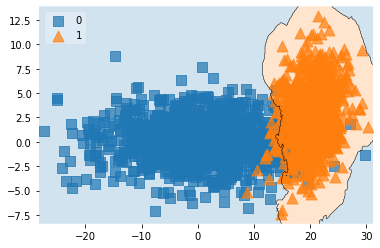

In [38]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

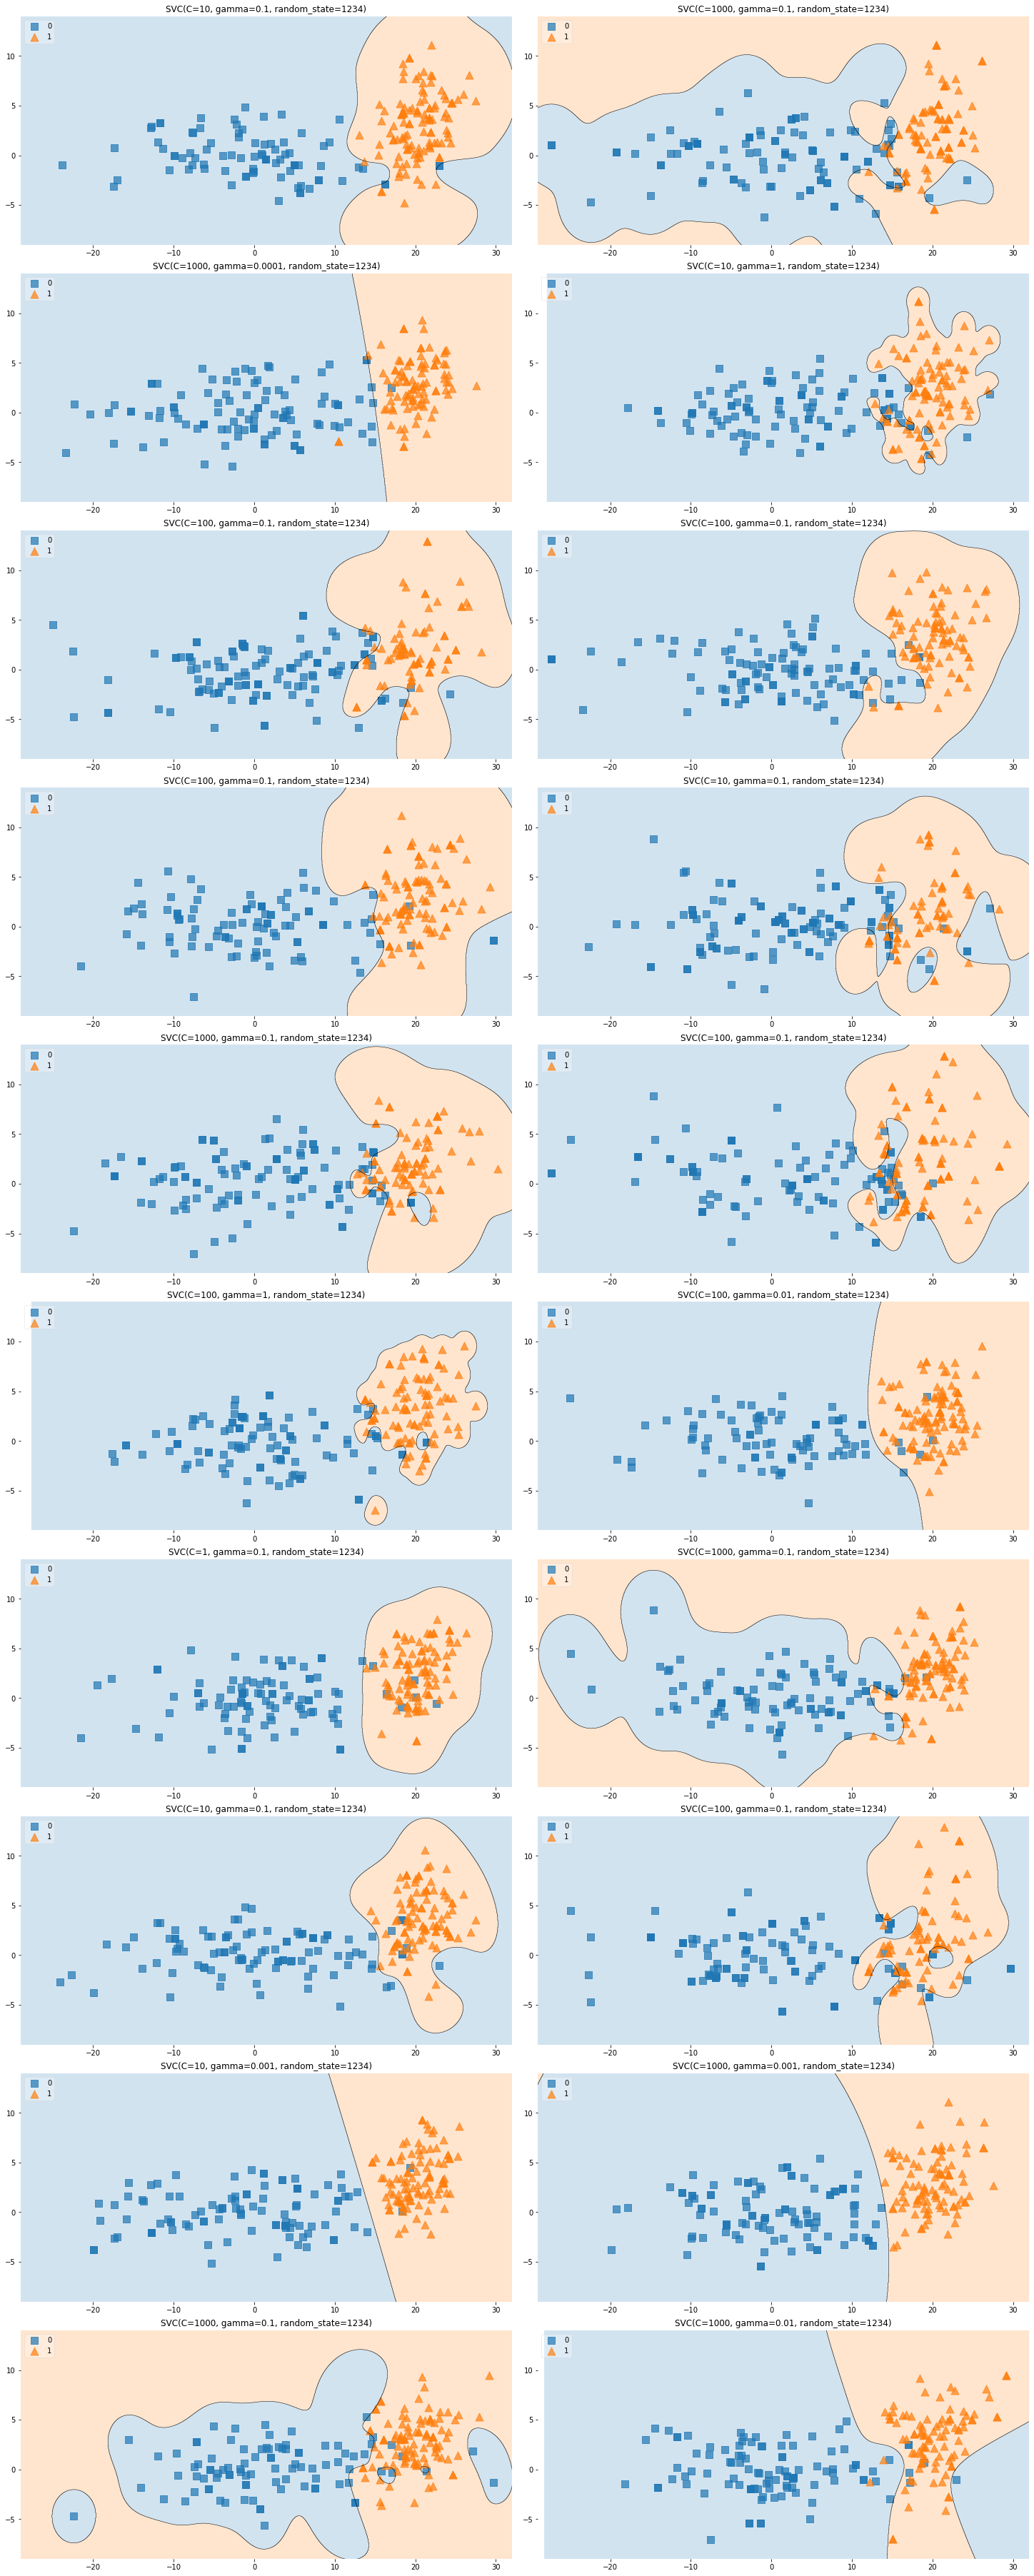

In [33]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners[:20], zoom=0.1)